<a href="https://colab.research.google.com/github/Adnunes/AnaliseBalancos/blob/main/analise_weg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [422]:
import pandas as pd
import seaborn as sns

In [423]:
dados = pd.read_csv('weg_detalhado_dre.csv', sep=';', skiprows=1)
dados.set_index('Descrição da Conta', inplace= True)
dados = dados.replace([',','- '],['.',0], regex=True).astype(float)

In [424]:
dados.head(10)

,2009,1T10,2T10,3T10,4T10,1T11,2T11,3T11,4T11,1T12,2T12,3T12,4T12,1T13,2T13,3T13,4T13,1T14,2T14,3T14,4T14,1T15,2T15,3T15,4T15,1T16,2T16,3T16,4T16,1T17,2T17,3T17,4T17,1T18,2T18,3T18,4T18,1T19,2T19,3T19,4T19,1T20,2T20,3T20,4T20
Descrição da Conta,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Receita de Venda de Bens e/ou Serviços,4210.60,931.90,1013.00,1188.60,1258.40,1126.10,1277.30,1317.50,1468.60,1369.80,1528.80,1613.10,1662.30,1477.60,1699.60,1758.40,1893.30,1783.50,1821.50,2056.00,2179.70,2130.30,2349.40,2546.30,2734.30,2416.30,2335.30,2238.10,2377.30,2134.20,2280.80,2435.10,2673.70,2551.50,3056.60,3237.30,3124.70,2932.40,3286.60,3349.60,3778.80,3714.40,4063.90,4801.30,4889.90
Mercado Interno (Nota explicativa 22),2526.40,614.50,629.10,690.40,736.40,660.30,723.30,737.40,781.90,714.30,729.20,798.60,774.50,772.90,873.40,872.40,913.40,895.40,900.30,994.10,1086.90,1027.90,1051.50,1087.40,1060.50,994.80,947.20,991.10,1069.10,990.90,972.60,1008.20,1232.00,1128.60,1318.90,1375.40,1259.70,1252.20,1289.70,1378.10,1643.10,1692.40,1604.20,2085.20,2248.00
Mercado Externo (Nota explicativa 22),1684.20,317.40,384.00,498.20,522.00,465.80,553.90,580.10,686.60,655.50,799.60,814.40,887.70,704.60,826.30,886.00,979.90,888.10,921.20,1061.90,1092.80,1102.40,1297.90,1459.00,1673.70,1421.50,1388.00,1247.00,1308.20,1143.30,1308.20,1426.90,1441.80,1422.90,1737.70,1861.90,1864.90,1680.20,1996.90,1971.50,2135.80,2022.00,2459.70,2716.00,2642.00
,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Custo dos Bens e/ou Serviços Vendidos,-2854.20,-623.30,-703.20,-811.40,-867.10,-815.50,-895.80,-899.20,-1022.90,-977.80,-1067.40,-1114.50,-1133.50,-1014.00,-1141.60,-1159.20,-1277.30,-1213.10,-1244.20,-1417.40,-1481.50,-1491.70,-1677.70,-1821.50,-2003.80,-1743.60,-1693.60,-1619.10,-1674.90,-1496.90,-1599.70,-1701.90,-1967.00,-1827.90,-2177.70,-2288.30,-2207.00,-2074.80,-2341.30,-2344.40,-2633.60,-2616.90,-2831.80,-3289.70,-3293.60
Materiais,0.65,0.63,0.61,0.62,0.64,0.64,0.65,0.65,0.66,0.64,0.63,0.64,0.65,0.64,0.63,0.64,0.64,0.65,0.64,0.65,0.65,0.65,0.64,0.65,0.66,0.65,0.64,0.64,0.66,0.63,0.63,0.64,0.68,0.66,0.67,0.67,0.68,0.64,0.64,0.65,0.70,0.64,0.68,0.70,0.69
Pessoal,0.20,0.25,0.24,0.23,0.22,0.22,0.22,0.22,0.21,0.23,0.23,0.22,0.21,0.23,0.23,0.22,0.22,0.23,0.23,0.22,0.22,0.21,0.21,0.21,0.20,0.21,0.22,0.21,0.20,0.23,0.23,0.22,0.19,0.22,0.21,0.21,0.20,0.24,0.23,0.23,0.20,0.23,0.20,0.19,0.20
Depreciação,0.05,0.04,0.06,0.05,0.05,0.05,0.05,0.05,0.04,0.04,0.04,0.04,0.04,0.05,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.05,0.04,0.04,0.04,0.04,0.05,0.05,0.05,0.04,0.04,0.04,0.03,0.04,0.03,0.03,0.03,0.04,0.04,0.04,0.03,0.04,0.03,0.03,0.03


In [425]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, nan to nan
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2009    83 non-null     float64
 1   1T10    83 non-null     float64
 2   2T10    83 non-null     float64
 3   3T10    83 non-null     float64
 4   4T10    83 non-null     float64
 5   1T11    83 non-null     float64
 6   2T11    83 non-null     float64
 7   3T11    83 non-null     float64
 8   4T11    83 non-null     float64
 9   1T12    83 non-null     float64
 10  2T12    83 non-null     float64
 11  3T12    83 non-null     float64
 12  4T12    83 non-null     float64
 13  1T13    83 non-null     float64
 14  2T13    83 non-null     float64
 15  3T13    83 non-null     float64
 16  4T13    83 non-null     float64
 17  1T14    83 non-null     float64
 18  2T14    83 non-null     float64
 19  3T14    83 non-null     float64
 20  4T14    83 non-null     float64
 21  1T15    83 non-null     float64
 22  2T15 

In [426]:
dados.dropna(inplace=True)
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries,  Receita de Venda de Bens e/ou Serviços  to Resultado da equivalência patrimonial
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2009    81 non-null     float64
 1   1T10    81 non-null     float64
 2   2T10    81 non-null     float64
 3   3T10    81 non-null     float64
 4   4T10    81 non-null     float64
 5   1T11    81 non-null     float64
 6   2T11    81 non-null     float64
 7   3T11    81 non-null     float64
 8   4T11    81 non-null     float64
 9   1T12    81 non-null     float64
 10  2T12    81 non-null     float64
 11  3T12    81 non-null     float64
 12  4T12    81 non-null     float64
 13  1T13    81 non-null     float64
 14  2T13    81 non-null     float64
 15  3T13    81 non-null     float64
 16  4T13    81 non-null     float64
 17  1T14    81 non-null     float64
 18  2T14    81 non-null     float64
 19  3T14    81 non-null     float64
 20  4T14    8

In [427]:
dados.head()

,2009,1T10,2T10,3T10,4T10,1T11,2T11,3T11,4T11,1T12,2T12,3T12,4T12,1T13,2T13,3T13,4T13,1T14,2T14,3T14,4T14,1T15,2T15,3T15,4T15,1T16,2T16,3T16,4T16,1T17,2T17,3T17,4T17,1T18,2T18,3T18,4T18,1T19,2T19,3T19,4T19,1T20,2T20,3T20,4T20
Descrição da Conta,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Receita de Venda de Bens e/ou Serviços,4210.60,931.90,1013.00,1188.60,1258.40,1126.10,1277.30,1317.50,1468.60,1369.80,1528.80,1613.10,1662.30,1477.60,1699.60,1758.40,1893.30,1783.50,1821.50,2056.00,2179.70,2130.30,2349.40,2546.30,2734.30,2416.30,2335.30,2238.10,2377.30,2134.20,2280.80,2435.10,2673.70,2551.50,3056.60,3237.30,3124.70,2932.40,3286.60,3349.60,3778.8,3714.40,4063.90,4801.3,4889.90
Mercado Interno (Nota explicativa 22),2526.40,614.50,629.10,690.40,736.40,660.30,723.30,737.40,781.90,714.30,729.20,798.60,774.50,772.90,873.40,872.40,913.40,895.40,900.30,994.10,1086.90,1027.90,1051.50,1087.40,1060.50,994.80,947.20,991.10,1069.10,990.90,972.60,1008.20,1232.00,1128.60,1318.90,1375.40,1259.70,1252.20,1289.70,1378.10,1643.1,1692.40,1604.20,2085.2,2248.00
Mercado Externo (Nota explicativa 22),1684.20,317.40,384.00,498.20,522.00,465.80,553.90,580.10,686.60,655.50,799.60,814.40,887.70,704.60,826.30,886.00,979.90,888.10,921.20,1061.90,1092.80,1102.40,1297.90,1459.00,1673.70,1421.50,1388.00,1247.00,1308.20,1143.30,1308.20,1426.90,1441.80,1422.90,1737.70,1861.90,1864.90,1680.20,1996.90,1971.50,2135.8,2022.00,2459.70,2716.0,2642.00
Custo dos Bens e/ou Serviços Vendidos,-2854.20,-623.30,-703.20,-811.40,-867.10,-815.50,-895.80,-899.20,-1022.90,-977.80,-1067.40,-1114.50,-1133.50,-1014.00,-1141.60,-1159.20,-1277.30,-1213.10,-1244.20,-1417.40,-1481.50,-1491.70,-1677.70,-1821.50,-2003.80,-1743.60,-1693.60,-1619.10,-1674.90,-1496.90,-1599.70,-1701.90,-1967.00,-1827.90,-2177.70,-2288.30,-2207.00,-2074.80,-2341.30,-2344.40,-2633.6,-2616.90,-2831.80,-3289.7,-3293.60
Materiais,0.65,0.63,0.61,0.62,0.64,0.64,0.65,0.65,0.66,0.64,0.63,0.64,0.65,0.64,0.63,0.64,0.64,0.65,0.64,0.65,0.65,0.65,0.64,0.65,0.66,0.65,0.64,0.64,0.66,0.63,0.63,0.64,0.68,0.66,0.67,0.67,0.68,0.64,0.64,0.65,0.7,0.64,0.68,0.7,0.69


##1. Análise de Custos
***

In [428]:
dados.head(9)

,2009,1T10,2T10,3T10,4T10,1T11,2T11,3T11,4T11,1T12,2T12,3T12,4T12,1T13,2T13,3T13,4T13,1T14,2T14,3T14,4T14,1T15,2T15,3T15,4T15,1T16,2T16,3T16,4T16,1T17,2T17,3T17,4T17,1T18,2T18,3T18,4T18,1T19,2T19,3T19,4T19,1T20,2T20,3T20,4T20
Descrição da Conta,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Receita de Venda de Bens e/ou Serviços,4210.60,931.90,1013.00,1188.60,1258.40,1126.10,1277.30,1317.50,1468.60,1369.80,1528.80,1613.10,1662.30,1477.60,1699.60,1758.40,1893.30,1783.50,1821.50,2056.00,2179.70,2130.30,2349.40,2546.30,2734.30,2416.30,2335.30,2238.10,2377.30,2134.20,2280.80,2435.10,2673.70,2551.50,3056.60,3237.30,3124.70,2932.40,3286.60,3349.60,3778.80,3714.40,4063.90,4801.30,4889.90
Mercado Interno (Nota explicativa 22),2526.40,614.50,629.10,690.40,736.40,660.30,723.30,737.40,781.90,714.30,729.20,798.60,774.50,772.90,873.40,872.40,913.40,895.40,900.30,994.10,1086.90,1027.90,1051.50,1087.40,1060.50,994.80,947.20,991.10,1069.10,990.90,972.60,1008.20,1232.00,1128.60,1318.90,1375.40,1259.70,1252.20,1289.70,1378.10,1643.10,1692.40,1604.20,2085.20,2248.00
Mercado Externo (Nota explicativa 22),1684.20,317.40,384.00,498.20,522.00,465.80,553.90,580.10,686.60,655.50,799.60,814.40,887.70,704.60,826.30,886.00,979.90,888.10,921.20,1061.90,1092.80,1102.40,1297.90,1459.00,1673.70,1421.50,1388.00,1247.00,1308.20,1143.30,1308.20,1426.90,1441.80,1422.90,1737.70,1861.90,1864.90,1680.20,1996.90,1971.50,2135.80,2022.00,2459.70,2716.00,2642.00
Custo dos Bens e/ou Serviços Vendidos,-2854.20,-623.30,-703.20,-811.40,-867.10,-815.50,-895.80,-899.20,-1022.90,-977.80,-1067.40,-1114.50,-1133.50,-1014.00,-1141.60,-1159.20,-1277.30,-1213.10,-1244.20,-1417.40,-1481.50,-1491.70,-1677.70,-1821.50,-2003.80,-1743.60,-1693.60,-1619.10,-1674.90,-1496.90,-1599.70,-1701.90,-1967.00,-1827.90,-2177.70,-2288.30,-2207.00,-2074.80,-2341.30,-2344.40,-2633.60,-2616.90,-2831.80,-3289.70,-3293.60
Materiais,0.65,0.63,0.61,0.62,0.64,0.64,0.65,0.65,0.66,0.64,0.63,0.64,0.65,0.64,0.63,0.64,0.64,0.65,0.64,0.65,0.65,0.65,0.64,0.65,0.66,0.65,0.64,0.64,0.66,0.63,0.63,0.64,0.68,0.66,0.67,0.67,0.68,0.64,0.64,0.65,0.70,0.64,0.68,0.70,0.69
Pessoal,0.20,0.25,0.24,0.23,0.22,0.22,0.22,0.22,0.21,0.23,0.23,0.22,0.21,0.23,0.23,0.22,0.22,0.23,0.23,0.22,0.22,0.21,0.21,0.21,0.20,0.21,0.22,0.21,0.20,0.23,0.23,0.22,0.19,0.22,0.21,0.21,0.20,0.24,0.23,0.23,0.20,0.23,0.20,0.19,0.20
Depreciação,0.05,0.04,0.06,0.05,0.05,0.05,0.05,0.05,0.04,0.04,0.04,0.04,0.04,0.05,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.05,0.04,0.04,0.04,0.04,0.05,0.05,0.05,0.04,0.04,0.04,0.03,0.04,0.03,0.03,0.03,0.04,0.04,0.04,0.03,0.04,0.03,0.03,0.03
Outros,0.10,0.09,0.10,0.10,0.10,0.09,0.09,0.09,0.09,0.08,0.09,0.09,0.09,0.09,0.10,0.10,0.10,0.08,0.09,0.09,0.09,0.09,0.10,0.11,0.10,0.09,0.09,0.10,0.10,0.10,0.10,0.10,0.09,0.09,0.09,0.10,0.09,0.09,0.09,0.09,0.07,0.09,0.09,0.08,0.08
Resultado Bruto,1356.40,308.60,309.80,377.20,391.30,310.70,381.40,418.30,445.70,391.90,461.40,498.50,528.80,463.60,558.00,599.20,616.00,570.40,577.30,638.50,698.20,638.60,671.70,724.80,730.40,672.80,641.70,619.00,702.40,637.40,681.10,733.20,706.80,723.60,879.00,949.00,917.70,857.60,945.30,1005.20,1145.20,1097.50,1232.10,1511.60,1596.30


In [429]:
conversao_valores_materiais = dados.loc['Materiais']*dados.loc[' Custo dos Bens e/ou Serviços Vendidos ']

In [430]:
conversao_valores_pessoal = dados.loc['Pessoal']*dados.loc[' Custo dos Bens e/ou Serviços Vendidos ']

In [431]:
conversao_valores_depreciacao = dados.loc['Depreciação']*dados.loc[' Custo dos Bens e/ou Serviços Vendidos ']

In [432]:
conversao_valores_outros = dados.loc['Outros']*dados.loc[' Custo dos Bens e/ou Serviços Vendidos ']

In [433]:
dados.loc['Materiais'] = conversao_valores_materiais

In [434]:
 dados.loc['Pessoal'] = conversao_valores_pessoal

In [435]:
 dados.loc['Depreciação'] = conversao_valores_depreciacao

In [436]:
dados.loc['Outros'] = conversao_valores_outros

In [476]:
dados.head(9)

,1T10,2T10,3T10,4T10,1T11,2T11,3T11,4T11,1T12,2T12,3T12,4T12,1T13,2T13,3T13,4T13,1T14,2T14,3T14,4T14,1T15,2T15,3T15,4T15,1T16,2T16,3T16,4T16,1T17,2T17,3T17,4T17,1T18,2T18,3T18,4T18,1T19,2T19,3T19,4T19,1T20,2T20,3T20,4T20
Descrição da Conta,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Receita de Venda de Bens e/ou Serviços,931.900,1013.000,1188.600,1258.400,1126.100,1277.300,1317.500,1468.600,1369.800,1528.800,1613.100,1662.300,1477.60,1699.600,1758.400,1893.300,1783.500,1821.500,2056.000,2179.700,2130.300,2349.400,2546.300,2734.300,2416.300,2335.300,2238.100,2377.300,2134.200,2280.800,2435.100,2673.70,2551.500,3056.600,3237.300,3124.70,2932.400,3286.600,3349.600,3778.800,3714.400,4063.900,4801.300,4889.900
Mercado Interno (Nota explicativa 22),614.500,629.100,690.400,736.400,660.300,723.300,737.400,781.900,714.300,729.200,798.600,774.500,772.90,873.400,872.400,913.400,895.400,900.300,994.100,1086.900,1027.900,1051.500,1087.400,1060.500,994.800,947.200,991.100,1069.100,990.900,972.600,1008.200,1232.00,1128.600,1318.900,1375.400,1259.70,1252.200,1289.700,1378.100,1643.100,1692.400,1604.200,2085.200,2248.000
Mercado Externo (Nota explicativa 22),317.400,384.000,498.200,522.000,465.800,553.900,580.100,686.600,655.500,799.600,814.400,887.700,704.60,826.300,886.000,979.900,888.100,921.200,1061.900,1092.800,1102.400,1297.900,1459.000,1673.700,1421.500,1388.000,1247.000,1308.200,1143.300,1308.200,1426.900,1441.80,1422.900,1737.700,1861.900,1864.90,1680.200,1996.900,1971.500,2135.800,2022.000,2459.700,2716.000,2642.000
Custo dos Bens e/ou Serviços Vendidos,-623.300,-703.200,-811.400,-867.100,-815.500,-895.800,-899.200,-1022.900,-977.800,-1067.400,-1114.500,-1133.500,-1014.00,-1141.600,-1159.200,-1277.300,-1213.100,-1244.200,-1417.400,-1481.500,-1491.700,-1677.700,-1821.500,-2003.800,-1743.600,-1693.600,-1619.100,-1674.900,-1496.900,-1599.700,-1701.900,-1967.00,-1827.900,-2177.700,-2288.300,-2207.00,-2074.800,-2341.300,-2344.400,-2633.600,-2616.900,-2831.800,-3289.700,-3293.600
Materiais,-392.679,-428.952,-503.068,-554.944,-521.920,-582.270,-584.480,-675.114,-625.792,-672.462,-713.280,-736.775,-648.96,-719.208,-741.888,-817.472,-788.515,-796.288,-921.310,-962.975,-969.605,-1073.728,-1183.975,-1322.508,-1133.340,-1083.904,-1036.224,-1105.434,-943.047,-1007.811,-1089.216,-1337.56,-1206.414,-1459.059,-1533.161,-1500.76,-1327.872,-1498.432,-1523.860,-1843.520,-1674.816,-1925.624,-2302.790,-2272.584
Pessoal,-155.825,-168.768,-186.622,-190.762,-179.410,-197.076,-197.824,-214.809,-224.894,-245.502,-245.190,-238.035,-233.22,-262.568,-255.024,-281.006,-279.013,-286.166,-311.828,-325.930,-313.257,-352.317,-382.515,-400.760,-366.156,-372.592,-340.011,-334.980,-344.287,-367.931,-374.418,-373.73,-402.138,-457.317,-480.543,-441.40,-497.952,-538.499,-539.212,-526.720,-601.887,-566.360,-625.043,-658.720
Depreciação,-24.932,-42.192,-40.570,-43.355,-40.775,-44.790,-44.960,-40.916,-39.112,-42.696,-44.580,-45.340,-50.70,-45.664,-46.368,-51.092,-48.524,-49.768,-56.696,-59.260,-74.585,-67.108,-72.860,-80.152,-69.744,-84.680,-80.955,-83.745,-59.876,-63.988,-68.076,-59.01,-73.116,-65.331,-68.649,-66.21,-82.992,-93.652,-93.776,-79.008,-104.676,-84.954,-98.691,-98.808
Outros,-56.097,-70.320,-81.140,-86.710,-73.395,-80.622,-80.928,-92.061,-78.224,-96.066,-100.305,-102.015,-91.26,-114.160,-115.920,-127.730,-97.048,-111.978,-127.566,-133.335,-134.253,-167.770,-200.365,-200.380,-156.924,-152.424,-161.910,-167.490,-149.690,-159.970,-170.190,-177.03,-164.511,-195.993,-228.830,-198.63,-186.732,-210.717,-210.996,-184.352,-235.521,-254.862,-263.176,-263.488
Resultado Bruto,308.600,309.800,377.200,391.300,310.700,381.400,418.300,445.700,391.900,461.400,498.500,528.800,463.60,558.000,599.200,616.000,570.400,577.300,638.500,698.200,638.600,671.700,724.800,730.400,672.800,641.700,619.000,702.400,637.400,681.100,733.200,706.80,723.600,879.000,949.000,917.70,857.600,945.300,1005.200,1145.200,1097.500,1232.100,1511.600,1596.300


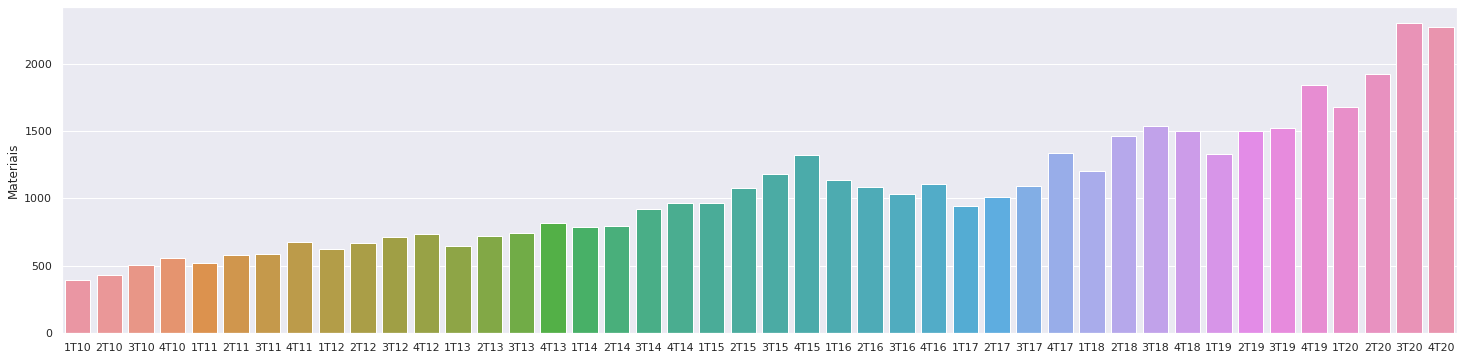

In [464]:

sns.set_theme(style='darkgrid') #seta a cor de fundo do grafico

ax = sns.barplot(y=abs(dados.loc['Materiais'],), x=['1T10', '2T10', '3T10', '4T10', '1T11', '2T11', '3T11', '4T11',
       '1T12', '2T12', '3T12', '4T12', '1T13', '2T13', '3T13', '4T13', '1T14',
       '2T14', '3T14', '4T14', '1T15', '2T15', '3T15', '4T15', '1T16', '2T16',
       '3T16', '4T16', '1T17', '2T17', '3T17', '4T17', '1T18', '2T18', '3T18',
       '4T18', '1T19', '2T19', '3T19', '4T19', '1T20', '2T20', '3T20', '4T20'])
ax.figure.set_size_inches(25,6)

'Pessoal':dados.loc['Pessoal'],'Depreciação':dados.loc['Depreciação'],'Outros':dados.loc['Outros']

In [484]:
df_custos = pd.DataFrame({'Materiais':dados.loc['Materiais'],'Pessoal':dados.loc['Pessoal'],'Depreciação':dados.loc['Depreciação'],'Outros':dados.loc['Outros']})
df_custos.head()

,Materiais,Pessoal,Depreciação,Outros
1T10,-392.679,-155.825,-24.932,-56.097
2T10,-428.952,-168.768,-42.192,-70.320
3T10,-503.068,-186.622,-40.570,-81.140
4T10,-554.944,-190.762,-43.355,-86.710
1T11,-521.920,-179.410,-40.775,-73.395
